In [22]:
import struct
import math
import array
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import random

from skimage import feature as ft
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#标签读取
def read_MNIST_lable(location):
    with open(location, "rb") as f:
        magic, size = struct.unpack(">II", f.read(8))
        labels = array("B", f.read())
        labels = np.array(labels,dtype='int32')
    return magic, size, labels

#图片读取
def read_MNIST_Pics(location):
    with open(location, "rb") as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        image_data = array("B", f.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]
        shape = (rows,cols)
        image_frame = pd.DataFrame(images,columns=['Pixel'+str(i) for i in range(784)])
    return magic,shape,image_frame

#图片显示            
def show_MNIST_pics(image_df,sele_index,shape,num):
    for i in range(num):
        plt.subplot(5,num/5+1,i+1)
        img = np.array(image_df.loc[sele_index[i],:],dtype='int32')
        img = img.reshape(shape[0],shape[1])
        img = Image.fromarray(img)
        plt.imshow(img, cmap='gray')
        plt.axis("off")

In [4]:
magic,size,labels = read_MNIST_lable('Y:/Kaggle/统计学习方法代码/train-labels.idx1-ubyte')
magic1,shape,image_frame = read_MNIST_Pics('Y:/Kaggle/统计学习方法代码/train-images.idx3-ubyte')

In [5]:
image_frame.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel774,Pixel775,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
labels

array([5, 0, 4, ..., 5, 6, 8])

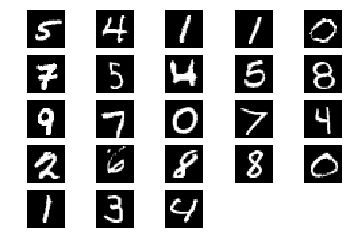

In [7]:
num = 23
sele_index = np.random.randint(1,60000,num)
show_MNIST_pics(image_frame.loc[sele_index,:],sele_index,shape,num)

In [8]:
# 抽取HOG特征并转成dataframe
def get_hog(img_df):
    image_value = img_df.get_values()
    features = []
    for i in range(img_df.shape[0]):
        features.append(ft.hog(image_value[i].reshape(28,28),  # input image
                  orientations=9,  # number of bins
                  pixels_per_cell=(7,7), # pixel per cell
                  cells_per_block=(2,2), # cells per blcok
                  block_norm = 'L2-Hys', #  block norm : str {‘L1’, ‘L1-sqrt’, ‘L2’, ‘L2-Hys’}
                  transform_sqrt = True, # power law compression (also known as gamma correction)
                  feature_vector=True, # flatten the final vectors
                  visualise=False)) # return HOG map
    return pd.DataFrame(features,columns=['Fture_'+str(i) for i in range(324)])

In [9]:
df = get_hog(image_frame)

In [10]:
labels1 = np.where(labels==1,1,0)

In [11]:
#拆分训练集，验证集
train_features_df, test_features_df, train_labels, test_labels = train_test_split(df, 
                                                                            labels1, 
                                                                            test_size=0.33,
                                                                            random_state=0)

In [12]:
train_features_df.head()

,Fture_0,Fture_1,Fture_2,Fture_3,Fture_4,Fture_5,Fture_6,Fture_7,Fture_8,Fture_9,...,Fture_314,Fture_315,Fture_316,Fture_317,Fture_318,Fture_319,Fture_320,Fture_321,Fture_322,Fture_323
39013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#定义逻辑斯底回归模型
class LogisticRegression(object):

    def __init__(self):
        #初始化学习率和迭代次数
        self.learning_step = 0.00001
        self.max_iteration = 5000

    def predict_y(self,x):
        #计算经验y，用于模型训练
        wx = np.dot(self.w,x)
        exp_wx = math.exp(wx)
        
        predict1 = exp_wx / (1 + exp_wx)
        predict0 = 1 / (1 + exp_wx)
        if predict1 > predict0:
            return 1
        else:
            return 0


    def train(self,features, labels):
        #features应该是M*N矩阵
        self.w = np.zeros(features.shape[1] + 1)

        correct_count = 0
        learnig_times = 0

        while learnig_times < self.max_iteration:
            index = random.randint(0, len(labels) - 1)
            x = list(features[index])
            x.append(1.0)
            y = labels[index]

            if y == self.predict_y(x):
                correct_count += 1
                #全部正确分类时停止训练
                if correct_count > self.max_iteration:
                    break
                continue

            learnig_times += 1
            correct_count = 0

            wx = np.dot(self.w,x)
            exp_wx = math.exp(wx)
            
            self.w += self.learning_step * (np.dot(x,y) - np.dot(x,exp_wx)/(1+exp_wx))
            print('训练完成度：',learnig_times/self.max_iteration*100)
           
    def predict(self,features):
        labels = []
        
        for index in range(features.shape[0]):
            x = list(features[index])
            x.append(1)
            labels.append(self.predict_y(x))

        return labels

In [18]:
logistic_reg = LogisticRegression()

In [19]:
logistic_reg.train(train_features_df.get_values(),train_labels)

训练完成度： 0.03333333333333333
训练完成度： 0.06666666666666667
训练完成度： 0.1
训练完成度： 0.13333333333333333
训练完成度： 0.16666666666666669
训练完成度： 0.2
训练完成度： 0.23333333333333336
训练完成度： 0.26666666666666666
训练完成度： 0.3
训练完成度： 0.33333333333333337
训练完成度： 0.36666666666666664
训练完成度： 0.4
训练完成度： 0.4333333333333333
训练完成度： 0.46666666666666673
训练完成度： 0.5
训练完成度： 0.5333333333333333
训练完成度： 0.5666666666666667
训练完成度： 0.6
训练完成度： 0.6333333333333333
训练完成度： 0.6666666666666667
训练完成度： 0.7000000000000001
训练完成度： 0.7333333333333333
训练完成度： 0.7666666666666666
训练完成度： 0.8
训练完成度： 0.8333333333333334
训练完成度： 0.8666666666666666
训练完成度： 0.8999999999999999
训练完成度： 0.9333333333333335
训练完成度： 0.9666666666666667
训练完成度： 1.0
训练完成度： 1.0333333333333332
训练完成度： 1.0666666666666667
训练完成度： 1.0999999999999999
训练完成度： 1.1333333333333333
训练完成度： 1.1666666666666667
训练完成度： 1.2
训练完成度： 1.2333333333333334
训练完成度： 1.2666666666666666
训练完成度： 1.3
训练完成度： 1.3333333333333335
训练完成度： 1.3666666666666667
训练完成度： 1.4000000000000001
训练完成度： 1.4333333333333333
训练完成度： 1.46666666666666

训练完成度： 12.866666666666667
训练完成度： 12.9
训练完成度： 12.933333333333334
训练完成度： 12.966666666666669
训练完成度： 13.0
训练完成度： 13.033333333333333
训练完成度： 13.066666666666665
训练完成度： 13.100000000000001
训练完成度： 13.133333333333333
训练完成度： 13.166666666666666
训练完成度： 13.200000000000001
训练完成度： 13.233333333333333
训练完成度： 13.266666666666666
训练完成度： 13.3
训练完成度： 13.333333333333334
训练完成度： 13.366666666666665
训练完成度： 13.4
训练完成度： 13.433333333333334
训练完成度： 13.466666666666665
训练完成度： 13.5
训练完成度： 13.533333333333333
训练完成度： 13.566666666666666
训练完成度： 13.600000000000001
训练完成度： 13.633333333333333
训练完成度： 13.666666666666666
训练完成度： 13.700000000000001
训练完成度： 13.733333333333334
训练完成度： 13.766666666666666
训练完成度： 13.8
训练完成度： 13.833333333333334
训练完成度： 13.866666666666665
训练完成度： 13.900000000000002
训练完成度： 13.933333333333334
训练完成度： 13.966666666666667
训练完成度： 14.000000000000002
训练完成度： 14.033333333333333
训练完成度： 14.066666666666666
训练完成度： 14.099999999999998
训练完成度： 14.133333333333335
训练完成度： 14.166666666666666
训练完成度： 14.2
训练完成度： 14.233333333333334
训练完成度：

训练完成度： 25.333333333333336
训练完成度： 25.366666666666664
训练完成度： 25.4
训练完成度： 25.433333333333337
训练完成度： 25.466666666666665
训练完成度： 25.5
训练完成度： 25.533333333333335
训练完成度： 25.566666666666666
训练完成度： 25.6
训练完成度： 25.633333333333336
训练完成度： 25.666666666666664
训练完成度： 25.7
训练完成度： 25.733333333333334
训练完成度： 25.766666666666666
训练完成度： 25.8
训练完成度： 25.833333333333336
训练完成度： 25.866666666666667
训练完成度： 25.900000000000002
训练完成度： 25.933333333333337
训练完成度： 25.966666666666665
训练完成度： 26.0
训练完成度： 26.033333333333335
训练完成度： 26.066666666666666
训练完成度： 26.1
训练完成度： 26.13333333333333
训练完成度： 26.166666666666664
训练完成度： 26.200000000000003
训练完成度： 26.23333333333333
训练完成度： 26.266666666666666
训练完成度： 26.3
训练完成度： 26.333333333333332
训练完成度： 26.366666666666667
训练完成度： 26.400000000000002
训练完成度： 26.43333333333333
训练完成度： 26.466666666666665
训练完成度： 26.5
训练完成度： 26.53333333333333
训练完成度： 26.566666666666666
训练完成度： 26.6
训练完成度： 26.633333333333333
训练完成度： 26.666666666666668
训练完成度： 26.700000000000003
训练完成度： 26.73333333333333
训练完成度： 26.766666666666666
训

训练完成度： 37.86666666666667
训练完成度： 37.9
训练完成度： 37.93333333333334
训练完成度： 37.96666666666667
训练完成度： 38.0
训练完成度： 38.03333333333334
训练完成度： 38.06666666666666
训练完成度： 38.1
训练完成度： 38.13333333333333
训练完成度： 38.166666666666664
训练完成度： 38.2
训练完成度： 38.233333333333334
训练完成度： 38.266666666666666
训练完成度： 38.3
训练完成度： 38.333333333333336
训练完成度： 38.36666666666667
训练完成度： 38.4
训练完成度： 38.43333333333334
训练完成度： 38.46666666666667
训练完成度： 38.5
训练完成度： 38.53333333333334
训练完成度： 38.56666666666666
训练完成度： 38.6
训练完成度： 38.63333333333333
训练完成度： 38.666666666666664
训练完成度： 38.7
训练完成度： 38.733333333333334
训练完成度： 38.766666666666666
训练完成度： 38.800000000000004
训练完成度： 38.83333333333333
训练完成度： 38.86666666666667
训练完成度： 38.9
训练完成度： 38.93333333333333
训练完成度： 38.96666666666667
训练完成度： 39.0
训练完成度： 39.03333333333333
训练完成度： 39.06666666666666
训练完成度： 39.1
训练完成度： 39.13333333333333
训练完成度： 39.166666666666664
训练完成度： 39.2
训练完成度： 39.233333333333334
训练完成度： 39.266666666666666
训练完成度： 39.300000000000004
训练完成度： 39.33333333333333
训练完成度： 39.36666666666667
训练完成度： 

训练完成度： 51.7
训练完成度： 51.733333333333334
训练完成度： 51.76666666666667
训练完成度： 51.800000000000004
训练完成度： 51.83333333333333
训练完成度： 51.866666666666674
训练完成度： 51.9
训练完成度： 51.93333333333333
训练完成度： 51.96666666666667
训练完成度： 52.0
训练完成度： 52.03333333333333
训练完成度： 52.06666666666667
训练完成度： 52.1
训练完成度： 52.13333333333333
训练完成度： 52.166666666666664
训练完成度： 52.2
训练完成度： 52.233333333333334
训练完成度： 52.26666666666666
训练完成度： 52.300000000000004
训练完成度： 52.33333333333333
训练完成度： 52.36666666666666
训练完成度： 52.400000000000006
训练完成度： 52.43333333333333
训练完成度： 52.46666666666666
训练完成度： 52.5
训练完成度： 52.53333333333333
训练完成度： 52.56666666666666
训练完成度： 52.6
训练完成度： 52.63333333333333
训练完成度： 52.666666666666664
训练完成度： 52.7
训练完成度： 52.733333333333334
训练完成度： 52.76666666666666
训练完成度： 52.800000000000004
训练完成度： 52.83333333333333
训练完成度： 52.86666666666666
训练完成度： 52.900000000000006
训练完成度： 52.93333333333333
训练完成度： 52.96666666666666
训练完成度： 53.0
训练完成度： 53.03333333333333
训练完成度： 53.06666666666666
训练完成度： 53.1
训练完成度： 53.13333333333333
训练完成度： 53.166666666

训练完成度： 65.13333333333333
训练完成度： 65.16666666666666
训练完成度： 65.2
训练完成度： 65.23333333333333
训练完成度： 65.26666666666667
训练完成度： 65.3
训练完成度： 65.33333333333333
训练完成度： 65.36666666666666
训练完成度： 65.4
训练完成度： 65.43333333333334
训练完成度： 65.46666666666667
训练完成度： 65.5
训练完成度： 65.53333333333333
训练完成度： 65.56666666666666
训练完成度： 65.60000000000001
训练完成度： 65.63333333333333
训练完成度： 65.66666666666666
训练完成度： 65.7
训练完成度： 65.73333333333333
训练完成度： 65.76666666666667
训练完成度： 65.8
训练完成度： 65.83333333333333
训练完成度： 65.86666666666666
训练完成度： 65.9
训练完成度： 65.93333333333334
训练完成度： 65.96666666666667
训练完成度： 66.0
训练完成度： 66.03333333333333
训练完成度： 66.06666666666666
训练完成度： 66.10000000000001
训练完成度： 66.13333333333333
训练完成度： 66.16666666666666
训练完成度： 66.2
训练完成度： 66.23333333333333
训练完成度： 66.26666666666667
训练完成度： 66.3
训练完成度： 66.33333333333333
训练完成度： 66.36666666666666
训练完成度： 66.4
训练完成度： 66.43333333333334
训练完成度： 66.46666666666667
训练完成度： 66.5
训练完成度： 66.53333333333333
训练完成度： 66.56666666666666
训练完成度： 66.60000000000001
训练完成度： 66.63333333333334
训练完成度：

训练完成度： 78.26666666666667
训练完成度： 78.3
训练完成度： 78.33333333333333
训练完成度： 78.36666666666666
训练完成度： 78.4
训练完成度： 78.43333333333334
训练完成度： 78.46666666666667
训练完成度： 78.5
训练完成度： 78.53333333333333
训练完成度： 78.56666666666666
训练完成度： 78.60000000000001
训练完成度： 78.63333333333333
训练完成度： 78.66666666666666
训练完成度： 78.7
训练完成度： 78.73333333333333
训练完成度： 78.76666666666667
训练完成度： 78.8
训练完成度： 78.83333333333333
训练完成度： 78.86666666666666
训练完成度： 78.9
训练完成度： 78.93333333333334
训练完成度： 78.96666666666667
训练完成度： 79.0
训练完成度： 79.03333333333333
训练完成度： 79.06666666666666
训练完成度： 79.10000000000001
训练完成度： 79.13333333333334
训练完成度： 79.16666666666666
训练完成度： 79.2
训练完成度： 79.23333333333333
训练完成度： 79.26666666666667
训练完成度： 79.3
训练完成度： 79.33333333333333
训练完成度： 79.36666666666666
训练完成度： 79.4
训练完成度： 79.43333333333334
训练完成度： 79.46666666666667
训练完成度： 79.5
训练完成度： 79.53333333333333
训练完成度： 79.56666666666666
训练完成度： 79.60000000000001
训练完成度： 79.63333333333334
训练完成度： 79.66666666666666
训练完成度： 79.7
训练完成度： 79.73333333333333
训练完成度： 79.76666666666667
训练完成度：

训练完成度： 91.13333333333333
训练完成度： 91.16666666666666
训练完成度： 91.2
训练完成度： 91.23333333333333
训练完成度： 91.26666666666667
训练完成度： 91.3
训练完成度： 91.33333333333333
训练完成度： 91.36666666666666
训练完成度： 91.4
训练完成度： 91.43333333333334
训练完成度： 91.46666666666667
训练完成度： 91.5
训练完成度： 91.53333333333333
训练完成度： 91.56666666666666
训练完成度： 91.60000000000001
训练完成度： 91.63333333333334
训练完成度： 91.66666666666666
训练完成度： 91.7
训练完成度： 91.73333333333333
训练完成度： 91.76666666666667
训练完成度： 91.8
训练完成度： 91.83333333333333
训练完成度： 91.86666666666666
训练完成度： 91.9
训练完成度： 91.93333333333334
训练完成度： 91.96666666666667
训练完成度： 92.0
训练完成度： 92.03333333333333
训练完成度： 92.06666666666666
训练完成度： 92.10000000000001
训练完成度： 92.13333333333334
训练完成度： 92.16666666666666
训练完成度： 92.2
训练完成度： 92.23333333333333
训练完成度： 92.26666666666667
训练完成度： 92.30000000000001
训练完成度： 92.33333333333333
训练完成度： 92.36666666666666
训练完成度： 92.4
训练完成度： 92.43333333333334
训练完成度： 92.46666666666667
训练完成度： 92.5
训练完成度： 92.53333333333333
训练完成度： 92.56666666666666
训练完成度： 92.60000000000001
训练完成度： 92.63333333

In [20]:
predict = logistic_reg.predict(test_features_df.get_values())
score = accuracy_score(predict, test_labels)
score

0.9703535353535353